---
title: Visualize temperature data
short_title: Temperature
---

In [1]:
import earthkit.data
import earthkit.plots
from earthkit.transforms import aggregate
from dhis2eo.integrations.xarray import data_array_to_dhis2_json

Load a NetCDF file using earthkit:

In [2]:
file = "../data/sierra-leone-era5-land-monthly-precip-2024.nc"
data = earthkit.data.from_source("file", file)

In [3]:
dataset = data.to_xarray()
precip = dataset['tp'] * 1000
precip

<xarray.DataArray 'tp' (valid_time: 12, latitude: 41, longitude: 41)> Size: 81kB
dask.array<mul, shape=(12, 41, 41), dtype=float32, chunksize=(12, 41, 41), chunktype=numpy.ndarray>
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 96B 2024-01-01 ... 2024-12-01
  * latitude    (latitude) float64 328B 10.0 9.9 9.8 9.7 9.6 ... 6.3 6.2 6.1 6.0
  * longitude   (longitude) float64 328B -14.0 -13.9 -13.8 ... -10.2 -10.1 -10.0
    expver      (valid_time) <U4 192B dask.array<chunksize=(12,), meta=np.ndarray>

/Users/mastermaps/miniforge3/lib/python3.10/site-packages/earthkit/plots/metadata/labels.py:131: UserWarning: No key "variable_name" found in layer metadata.
  warnings.warn(f'No key "{attr}" found in layer metadata.')


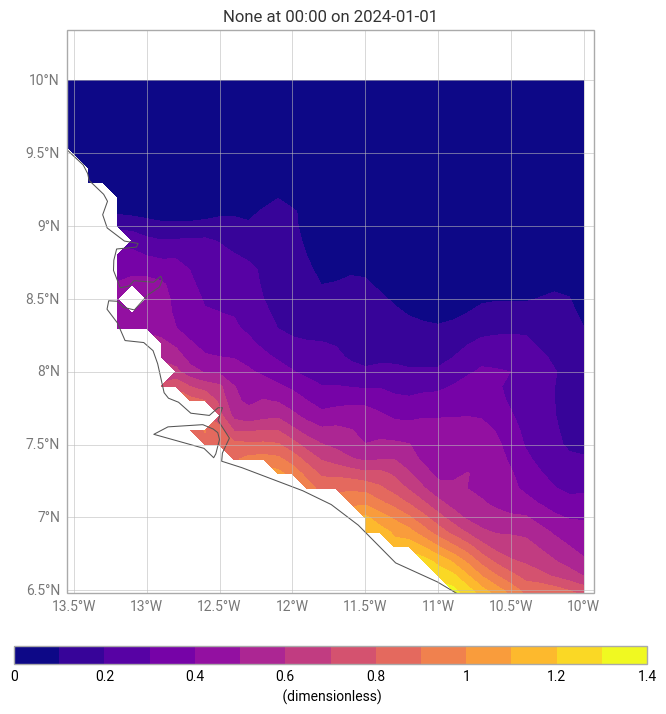

In [8]:
earthkit.plots.quickplot(precip, domain="Sierra Leone")

In [3]:
district_file = "../data/sierra-leone-districts.geojson"
features = earthkit.data.from_source("file", district_file)

In [4]:
agg_data = aggregate.spatial.reduce(data, features, mask_dim="id")

In [5]:
agg_data

<xarray.Dataset> Size: 1kB
Dimensions:     (valid_time: 12, id: 13)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 96B 2024-01-01 ... 2024-12-01
    expver      (valid_time) <U4 192B '0001' '0001' '0001' ... '0001' '0001'
  * id          (id) object 104B 'O6uvpzGd5pu' 'fdc6uOvgoji' ... 'at6UHUQatSo'
Data variables:
    tp          (id, valid_time) float32 624B 0.0003127 0.0002218 ... 0.0002239
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-23T07:20 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
data_array = agg_data['tp'] * 1000
rounded_array = data_array.astype('float64').round(decimals = 2)
# rounded_array

flat_array = data_array.stack(index=[...])
flat_array

<xarray.DataArray 'tp' (index: 156)> Size: 624B
array([3.12707275e-01, 5.60198352e-02, 8.02516997e-01, 2.53095776e-01,
       6.61327913e-02, 2.83716381e-01, 1.36579545e-02, 6.58459291e-02,
       4.35902208e-01, 2.82238036e-01, 7.40733624e-01, 1.34451911e-01,
       4.71298337e-01, 2.21847698e-01, 9.81529243e-03, 5.29348075e-01,
       1.20791771e-01, 1.43354405e-02, 1.76819324e-01, 5.82197681e-03,
       4.60383222e-02, 3.35115105e-01, 9.24748480e-02, 6.35571122e-01,
       5.80115728e-02, 2.23418146e-01, 1.30703723e+00, 3.48743983e-02,
       1.39913142e+00, 7.57281065e-01, 3.24834809e-02, 1.12824523e+00,
       9.16357562e-02, 3.57130647e-01, 9.11737025e-01, 1.44198626e-01,
       2.06250453e+00, 3.32221270e-01, 9.95708257e-02, 1.94339883e+00,
       4.69114244e-01, 1.95456278e+00, 1.82498312e+00, 2.91965574e-01,
       2.12210321e+00, 6.26843154e-01, 1.39418375e+00, 1.39949071e+00,
       6.90973043e-01, 3.15515876e+00, 9.20429468e-01, 7.41292655e-01,
       5.84885788e+00, 4.17748737e+00, 6.94890165e+00, 3.95638824e+00,
       4.56531048e+00, 4.84235620e+00, 4.33479929e+00, 4.12142229e+00,
       5.94944763e+00, 5.72600937e+00, 6.97325182e+00, 4.78807640e+00,
       6.31749058e+00, 1.13738146e+01, 6.30208826e+00, 2.17983437e+01,
       6.29150915e+00, 1.18024187e+01, 8.21190834e+00, 5.91306686e+00,
       7.96791744e+00, 1.72588005e+01, 1.62485428e+01, 1.70447235e+01,
       9.98803616e+00, 2.14855309e+01, 2.02377434e+01, 1.93222446e+01,
       3.04081993e+01, 1.15089865e+01, 2.35124168e+01, 1.59029121e+01,
       1.13706503e+01, 1.54976015e+01, 3.03433552e+01, 2.37695732e+01,
       2.25844784e+01, 1.95913773e+01, 3.44470367e+01, 1.82530956e+01,
       1.50899782e+01, 1.96665535e+01, 1.10197773e+01, 1.83531837e+01,
       1.45169868e+01, 1.23623371e+01, 1.29240513e+01, 2.33363094e+01,
       2.34591618e+01, 1.62634468e+01, 2.04040318e+01, 3.30296402e+01,
       2.84350319e+01, 1.66295624e+01, 2.78850307e+01, 1.95245380e+01,
       2.36312561e+01, 2.37693768e+01, 1.59091892e+01, 2.03640938e+01,
       2.64803886e+01, 2.60269585e+01, 3.00884247e+01, 2.34211006e+01,
       2.71337032e+01, 1.23036404e+01, 1.14983425e+01, 1.52374830e+01,
       6.92497730e+00, 9.58764839e+00, 8.80920506e+00, 9.71509361e+00,
       9.48306370e+00, 1.30063095e+01, 1.13291655e+01, 1.69555283e+01,
       1.39665127e+01, 1.32231464e+01, 2.01879668e+00, 7.37326026e-01,
       3.23772001e+00, 1.34266412e+00, 1.13489497e+00, 1.59748018e+00,
       5.64115226e-01, 8.72260749e-01, 2.57987833e+00, 1.80250907e+00,
       3.04620218e+00, 1.38502419e+00, 2.58771324e+00, 2.35664427e-01,
       8.19042418e-03, 7.66898155e-01, 7.59683996e-02, 2.21772622e-02,
       1.33511499e-01, 2.64771632e-03, 6.91856537e-03, 3.91987830e-01,
       9.08239707e-02, 7.34295368e-01, 5.47926873e-02, 2.23891377e-01],
      dtype=float32)
Coordinates:
    number      int64 8B 0
    expver      (index) <U4 2kB '0001' '0001' '0001' ... '0001' '0001' '0001'
  * index       (index) object 1kB MultiIndex
  * valid_time  (index) datetime64[ns] 1kB 2024-01-01 2024-01-01 ... 2024-12-01
  * id          (index) object 1kB 'O6uvpzGd5pu' 'fdc6uOvgoji' ... 'at6UHUQatSo'

In [7]:
json_dict = data_array_to_dhis2_json(
  data_array = flat_array,        # flattened data array
  org_unit_dim = 'id',            # dimension containing the org unit id
  period_dim = 'valid_time',      # dimension containing the period 
  data_element_id= 'VJwwPOOvge6'  # id of the DHIS2 data element
)

In [8]:
json_dict['dataValues'][:3]

[{'dataElement': 'VJwwPOOvge6',
  'orgUnit': 'O6uvpzGd5pu',
  'period': '20240101',
  'value': '0.3127072751522064'},
 {'dataElement': 'VJwwPOOvge6',
  'orgUnit': 'fdc6uOvgoji',
  'period': '20240101',
  'value': '0.05601983517408371'},
 {'dataElement': 'VJwwPOOvge6',
  'orgUnit': 'lc3eMKXaEfw',
  'period': '20240101',
  'value': '0.8025169968605042'}]

In [ ]:
# earthkit.plots.quickplot(data, domain="Sierra Leone")
# test = data.to_xarray()

